## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_data_complete = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
study_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
len(study_data_complete["Mouse ID"].unique())

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicateMouse = study_data_complete.duplicated(subset=["Mouse ID", "Timepoint"]).any()
duplicateMouse

duplicates = study_data_complete["Mouse ID"].value_counts()
duplicates = pd.DataFrame(duplicates)
duplicates = duplicates.rename(columns={"Mouse ID" : "Counts of Mouse ID"})
duplicates.head()

,Counts of Mouse ID
g989,13
a401,10
l509,10
q597,10
r604,10


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
# set the index to the mouse ID
study_data = study_data_complete.set_index("Mouse ID")
study_data.head()
#check the mouse data for ID
g989 = study_data.loc['g989',:]
g989

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,,,,,,,
g989,0,45.000000,0,Propriva,Female,21,26
g989,0,45.000000,0,Propriva,Female,21,26
g989,5,48.786801,0,Propriva,Female,21,26
g989,5,47.570392,0,Propriva,Female,21,26
g989,10,51.745156,0,Propriva,Female,21,26
g989,10,49.880528,0,Propriva,Female,21,26
g989,15,51.325852,1,Propriva,Female,21,26
g989,15,53.442020,0,Propriva,Female,21,26
g989,20,55.326122,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
study_data = study_data.reset_index()
study_data = study_data.drop_duplicates()
study_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
len(study_data_complete["Mouse ID"].unique())

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

# series vaiable to hold Tumor Volume Data grouped by Drug Regimen
tumor_volume = study_data.groupby(['Drug Regimen'])["Tumor Volume (mm3)"]
tumor_volume

#variable to hold the Mean Tumor Volume Data Grouped by Drug Regimen
mean_tumor_volume = tumor_volume.mean()

#variable to hold the Median Tumor Volume Data Group by Drug Regimen
median_tumor_volume = tumor_volume.median() 

#variable to hold the Tumor Volume Variance Data Group by Drug Regimen
var_tumor_volume = tumor_volume.var() 

#variable to hold the Tumor Volume Standard Deviation Data Group by Drug Regimen
std_tumor_volume = tumor_volume.std() 

#variable to hold the Tumor Volume Standard Error of Means Data Group by Drug Regimen
sem_tumor_volume = tumor_volume.sem() 

# convert to a dataframe
drug_tumor_df = pd.DataFrame({
    "Mean Tumor Volume": mean_tumor_volume,
    "Median Tumor Volume": median_tumor_volume,
    "Tumor Volume Variance": var_tumor_volume,
    "Tumor Volume Std.Dev": std_tumor_volume,
    "Tumor Volume SEM": sem_tumor_volume
})
drug_tumor_df.head(20)

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std.Dev,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
drug_tumor_df = study_data.groupby("Drug Regimen").agg(
    Mean_Tumor_Volume = ("Tumor Volume (mm3)", np.mean), Median_Tumor_Volume = ("Tumor Volume (mm3)", np.median),
Variance_Tumor_Volume = ("Tumor Volume (mm3)", np.var),
Stdev_Tumor_Volume = ("Tumor Volume (mm3)", np.std),
SEM_Tumor_Volume = ("Tumor Volume (mm3)", st.sem)
) 
drug_tumor_df

,Mean_Tumor_Volume,Median_Tumor_Volume,Variance_Tumor_Volume,Stdev_Tumor_Volume,SEM_Tumor_Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
# Get mice count per drug 

measures_per_drug_regimen = study_data["Drug Regimen"].value_counts()
drug_measures_df = pd.DataFrame({"Mice Count":measures_per_drug_regimen})

drug_measures_df.head(20)

,Mice Count
Capomulin,230
Ramicane,228
Ketapril,188
Naftisol,186
Zoniferol,182
Placebo,181
Stelasyn,181
Ceftamin,178
Infubinol,178
Propriva,160


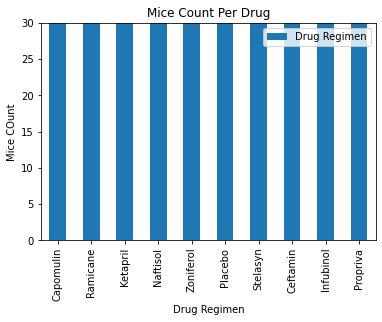

In [10]:
# plot the mouse counts for each drug using pandas 
bar_chart = drug_measures_df.plot.bar(title="Mice Count Per Drug", ylim=(0,30), 
                                      xlabel="Drug Regimen", ylabel="Mice COunt", align="center")
bar_chart.legend(["Drug Regimen"])

In [17]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
x_axis = study_data["Drug Regimen"].values_counts().keys()
y_axis = measures_per_drug_regimen

plt.xticks(rotation=90)
plt.title("Mouse Counts by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Mice Count")
plt.bar(x_axis, y_axis, color="blue", alpha=0.5, align="center")

AttributeError: 'Series' object has no attribute 'values_counts'

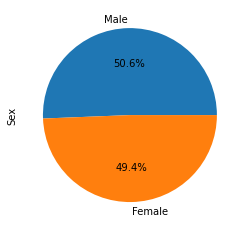

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_count = study_data['Sex'].value_counts() 
gender_count.plot(kind='pie', autopct="%1.1f%%")
plt.show()

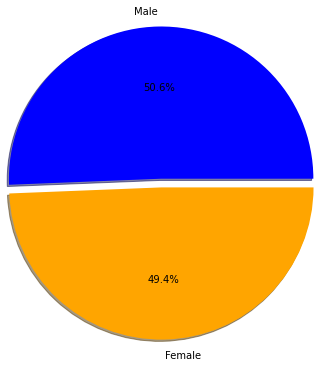

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_count = study_data['Sex'].value_counts()
colors = ['blue', 'orange']
explode = [0.1, 0]
plt.pie(gender_count.values , explode=explode, labels=gender_count.index.values, colors=colors,
       shadow=True, radius=1.75, autopct="%1.1f%%")
plt.show()

## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# set drug regimen as index and drop associated regimens while only keeping Capomulin, Ramicane, Infubinol, and Ceftamin
# isolated view of just capomulin for later use
# Reset index so drug regimen column persists after inner merge
# get mouse count per drug
# Start by getting the last (greatest) timepoint for each mouse

max_timepoints = study_data.groupby(["Mouse ID"])["Timepoint"].max()
max_timepoints = max_timepoints.reset_index()
max_timepoints_merge = max_timepoints.merge(study_data, on=["Mouse ID", "Timepoint"], how='left')
#max_timepoints_merge

In [ ]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

#show all rows of data

In [ ]:
# Put treatments into a list for for loop (and later for plot labels)
drug_regimen = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Locate the rows which contain mice on each drug and get the tumor volumes
tumor_vol = max_timepoints_merge[["Drug Regimen", "Tumor Volume (mm3)"]]
tumor_vol.head()

In [19]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
#determine outliers using upper and lower bounds CHECK DISPLAY

quartiles = max_timepoints_merge["Tumor Volume (mm3)"].quantile([0.25, 0.50, 0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
Iqr = upperq - lowerq

print(f"lower quartile is : {lowerq:,.2f}")
print(f"upper quartile is : {upperq:,.2f}")
print(f"IQR is : {Iqr:,.2f}")
print(f"median is : {quartiles[0.50]:,.2f}")

lowerbound = lowerq - (1.5*Iqr)
upperbound = upperq + (1.5*Iqr)
print(f"values that are below the {lowerbound:,.2f} could be outliers") 
print(f"values that are above the {upperbound:,.2f} could be outliers")

NameError: name 'max_timepoints_merge' is not defined

In [22]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
drug_regimen = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
tumor_vol_list = []
for drug in treatment_list:
    tumor_vol = study_data_4drugs.loc[study_data_drugs["Drug Regimen"] == drug, 'Tumor Volume (mm3)']
    tumor_vol_list.append(tumor_vol)


fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Volume For Drug Regimen")
ax1.set_ylabel("Final Tumor Volume")
ax1.set_xlabel("Drug Regimen")
ax1.boxplot(tumor_vol_list, labels=treatment_list, flierprops=dict(markerfacecolor='red'))
plt.show()

NameError: name 'study_data_4drugs' is not defined

## Line and Scatter Plots

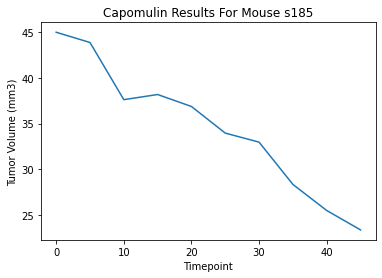

In [25]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#change index to mouse ID 
#remove other mouse IDs so only s185 show
#set the x_axis equal to the Timepoint 

study_data_capomulin = study_data.loc[(study_data["Drug Regimen"] == "Capomulin")]
study_data_capomulin.tail(15)

x_axis_data = study_data_capomulin.loc[study_data_capomulin["Mouse ID"] == 's185', "Timepoint"]
y_axis_data = study_data_capomulin.loc[study_data_capomulin["Mouse ID"] == 's185', "Tumor Volume (mm3)"]
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Results For Mouse s185")

plt.plot(x_axis_data, y_axis_data)

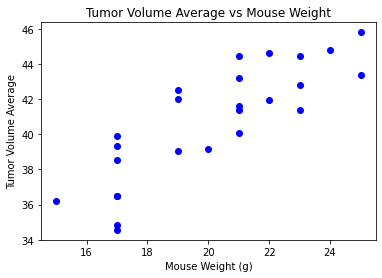

In [26]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# group by mouse ID to find average tumor volume
# establish x-axis value for the weight of the mice
#produce scatter plot of the data 

average_tumor_volumes = []
weights = []

for volume in (study_data_capomulin.groupby(["Mouse ID"]) ["Tumor Volume (mm3)"].mean()):
    average_tumor_volumes.append(volume)

for weight in (study_data_capomulin.groupby(["Mouse ID"]) ["Weight (g)"].mean()):
    weights.append(weight)
    
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume Average")
plt.title("Tumor Volume Average vs Mouse Weight")
plt.scatter(weights, average_tumor_volumes, marker='o', facecolors='blue', edgecolors='blue')


## Correlation and Regression

In [1]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
# for mouse weight and average tumor volume for the Capomulin regimen
#establish x and y values and find St. Pearson Correlation Coefficient for Mouse Weight and Tumor Volume Avg
#print St. Pearson Correlation Coefficient
# establish linear regression values
# linear regression line 
# scatter plot of the data

slope, intercept, rValue, std_err = stats.linregress(weights, average_tumor_volumes)
print(f"The St. Pearson Correlation Coefficient between both factors is {round(rValue, 2)}")

line_best_fit = slope*(study_data_capomulin.groupby(["Mouse ID"])["Weight (g)"].mean()) + intercept

plt.plot(weights, line_best_fit,"--", color="red")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume Average")
plt.title("Tumor Volume Average vs Mouse Weight")

annotion_string = 'y = ' + str(round(slope, 2)) + 'x + ' + str(round(intercept, 2))
plt.annotate(annotation_string, (8,45), fontsize=12, color='red')
plt.scatter(weights, average_tumor_volumes, marker='o', facecolors='blue', edgecolors='blue')
plt.show()

NameError: name 'stats' is not defined